In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

# Define paths to the dataset
train_dir = 'Augmented_data(1)/train'
valid_dir = 'Augmented_data(1)/valid'

batch_size = 64
img_size = (224, 224)

# Data Augmentation and Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
)

# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator
)

# Save the Model
model.save("waste_cnn_model.h5")

Found 19986 images belonging to 26 classes.
Found 7512 images belonging to 26 classes.


C:\Users\arshi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\arshi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
  2/313 ━━━━━━━━━━━━━━━━━━━━ 46:28 9s/step - accuracy: 0.0273 - loss: 4.2257   

KeyboardInterrupt: 

In [3]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

118/118 ━━━━━━━━━━━━━━━━━━━━ 26s 223ms/step


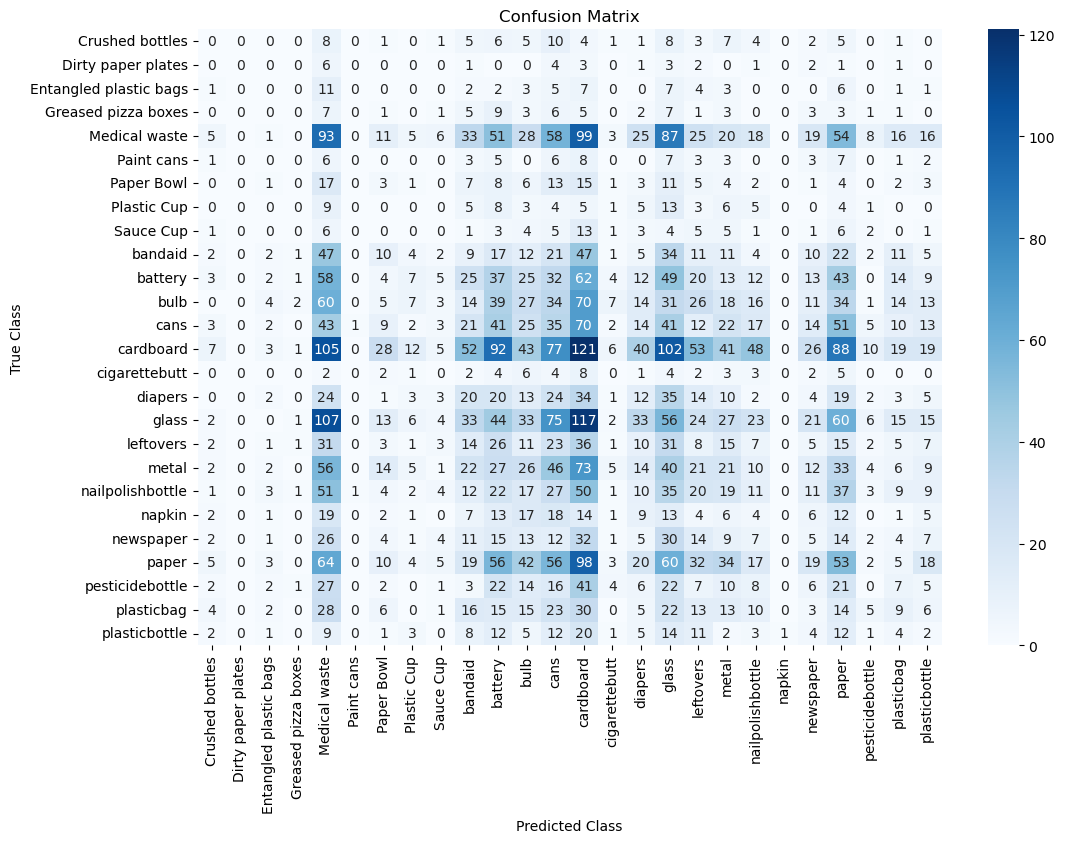

Classification Report:

                        precision    recall  f1-score   support

       Crushed bottles       0.00      0.00      0.00        72
    Dirty paper plates       0.00      0.00      0.00        25
Entangled plastic bags       0.00      0.00      0.00        53
   Greased pizza boxes       0.00      0.00      0.00        58
         Medical waste       0.10      0.14      0.12       681
            Paint cans       0.00      0.00      0.00        55
            Paper Bowl       0.02      0.03      0.02       107
           Plastic Cup       0.00      0.00      0.00        72
             Sauce Cup       0.00      0.00      0.00        62
               bandaid       0.03      0.03      0.03       290
               battery       0.06      0.08      0.07       450
                  bulb       0.07      0.06      0.06       450
                  cans       0.05      0.08      0.06       456
             cardboard       0.11      0.12      0.12       998
         cigare

C:\Users\arshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
valid_generator.reset()  # Ensure the generator starts at the beginning
predictions = model.predict(valid_generator, steps=valid_generator.samples // valid_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_classes = valid_generator.classes  # True class labels
class_labels = list(valid_generator.class_indices.keys())  # Class labels

# Create confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n")
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


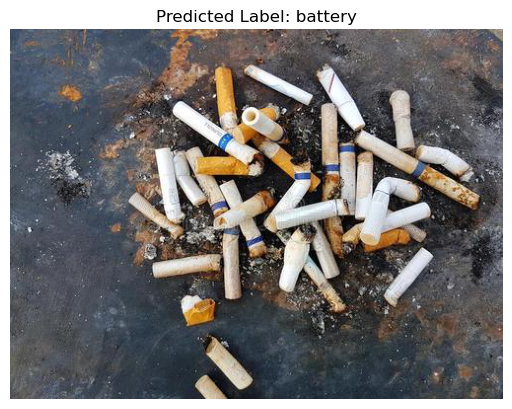

In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model_path = "waste_cnn_model.h5"
model = load_model(model_path)

# Define the labels (must match the labels used during training)
labels = list(valid_generator.class_indices.keys())  # Assuming val_generator is defined as in the previous code

# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch (1, height, width, channels)
    img_array /= 255.0  # Normalize the image
    return img_array

# Predict the label of an image
def predict_image_label(img_path):
    img = load_and_preprocess_image(img_path)
    prediction = model.predict(img)  # Get model predictions
    predicted_class = np.argmax(prediction, axis=1)  # Get the index of the highest probability
    predicted_label = labels[predicted_class[0]]  # Map index to class label

    # Display the image along with the prediction
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()

# Test the function
img_path = "Augmented_data(1)/cigarettebutt_cigarettebutt (23).jpg"  
predict_image_label(img_path)